In [1]:
!pip install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 348.9MB 62kB/s 
     |████████████████████████████████| 501kB 40.8MB/s 
     |████████████████████████████████| 3.1MB 26.4MB/s 


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.0.0-beta0'

In [0]:
from tensorflow import keras

In [0]:
cifar10 = keras.datasets.cifar10

In [7]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [8]:
type(train_labels)

numpy.ndarray

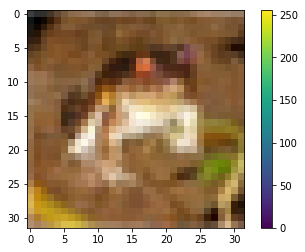

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
print(train_labels.shape)

(50000, 1)


In [0]:
train_images, test_images = train_images.astype(np.float32)/255., test_images.astype(np.float32)/255.
train_labels, test_labels = keras.utils.to_categorical(train_labels), keras.utils.to_categorical(test_labels)
# train_images, test_images = np.expand_dims(train_images, -1), np.expand_dims(test_images, -1)

In [0]:
print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 10)


In [0]:
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


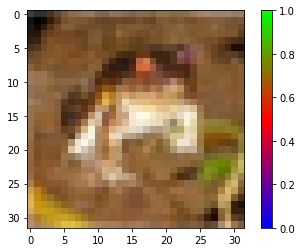

In [0]:
plt.figure()
plt.imshow(train_images[0].reshape(32, 32, 3), cmap=plt.cm.brg)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
def create_model():
  inputs = keras.layers.Input((32, 32, 3))
  
  net1 = keras.layers.Conv2D(64, kernel_size=1, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(inputs)
  net2 = keras.layers.Conv2D(5, kernel_size=3, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                           kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(inputs)
  net2 = keras.layers.Conv2D(64, kernel_size=3, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net2)
  net3 = keras.layers.Conv2D(5, kernel_size=5, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(inputs)
  net3 = keras.layers.Conv2D(64, kernel_size=5, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net3)
  net4 = keras.layers.MaxPooling2D(pool_size=2, strides = 1, padding = 'same')(inputs)
  net4 = keras.layers.Conv2D(64, kernel_size=1, strides= 1, activation = tf.nn.leaky_relu, padding='same', use_bias=False)(net4)
  
  net_1 = keras.layers.add([net1, net2, net3, net4])
  net_1 = keras.layers.BatchNormalization()(net_1)
  net_1 = keras.layers.LeakyReLU()(net_1)
  
  net1 = keras.layers.Conv2D(128, kernel_size=1, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net_1)
  net2 = keras.layers.Conv2D(5, kernel_size=3, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net_1)
  net2 = keras.layers.Conv2D(128, kernel_size=3, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net2)
  net3 = keras.layers.Conv2D(5, kernel_size=5, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net_1)
  net3 = keras.layers.Conv2D(128, kernel_size=5, strides= 1, activation = tf.nn.leaky_relu, padding='same',
                             kernel_regularizer=keras.regularizers.l2(0.001), use_bias=False)(net3)
  net4 = keras.layers.MaxPooling2D(pool_size=2, strides = 1, padding = 'same')(net_1)
  net4 = keras.layers.Conv2D(128, kernel_size=1, strides= 1, activation = tf.nn.leaky_relu, padding='same', use_bias=False)(net4)
  
  net_2 = keras.layers.add([net1, net2, net3, net4])
  net_2 = keras.layers.BatchNormalization()(net_2)
  net_2 = keras.layers.LeakyReLU()(net_2)
  
  net = keras.layers.Flatten()(net_2)
  net = keras.layers.Dense(256, activation = tf.nn.leaky_relu)(net)
  net = keras.layers.Dropout(0.3)(net)
  outputs = keras.layers.Dense(10, activation = tf.nn.softmax)(net)
  
  return keras.Model(inputs = inputs, outputs = outputs)


In [0]:
model = create_model()

In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 5)    135         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 5)    375         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 3)    0           input_1[0][0]                    
______________________________________________________________________________________________

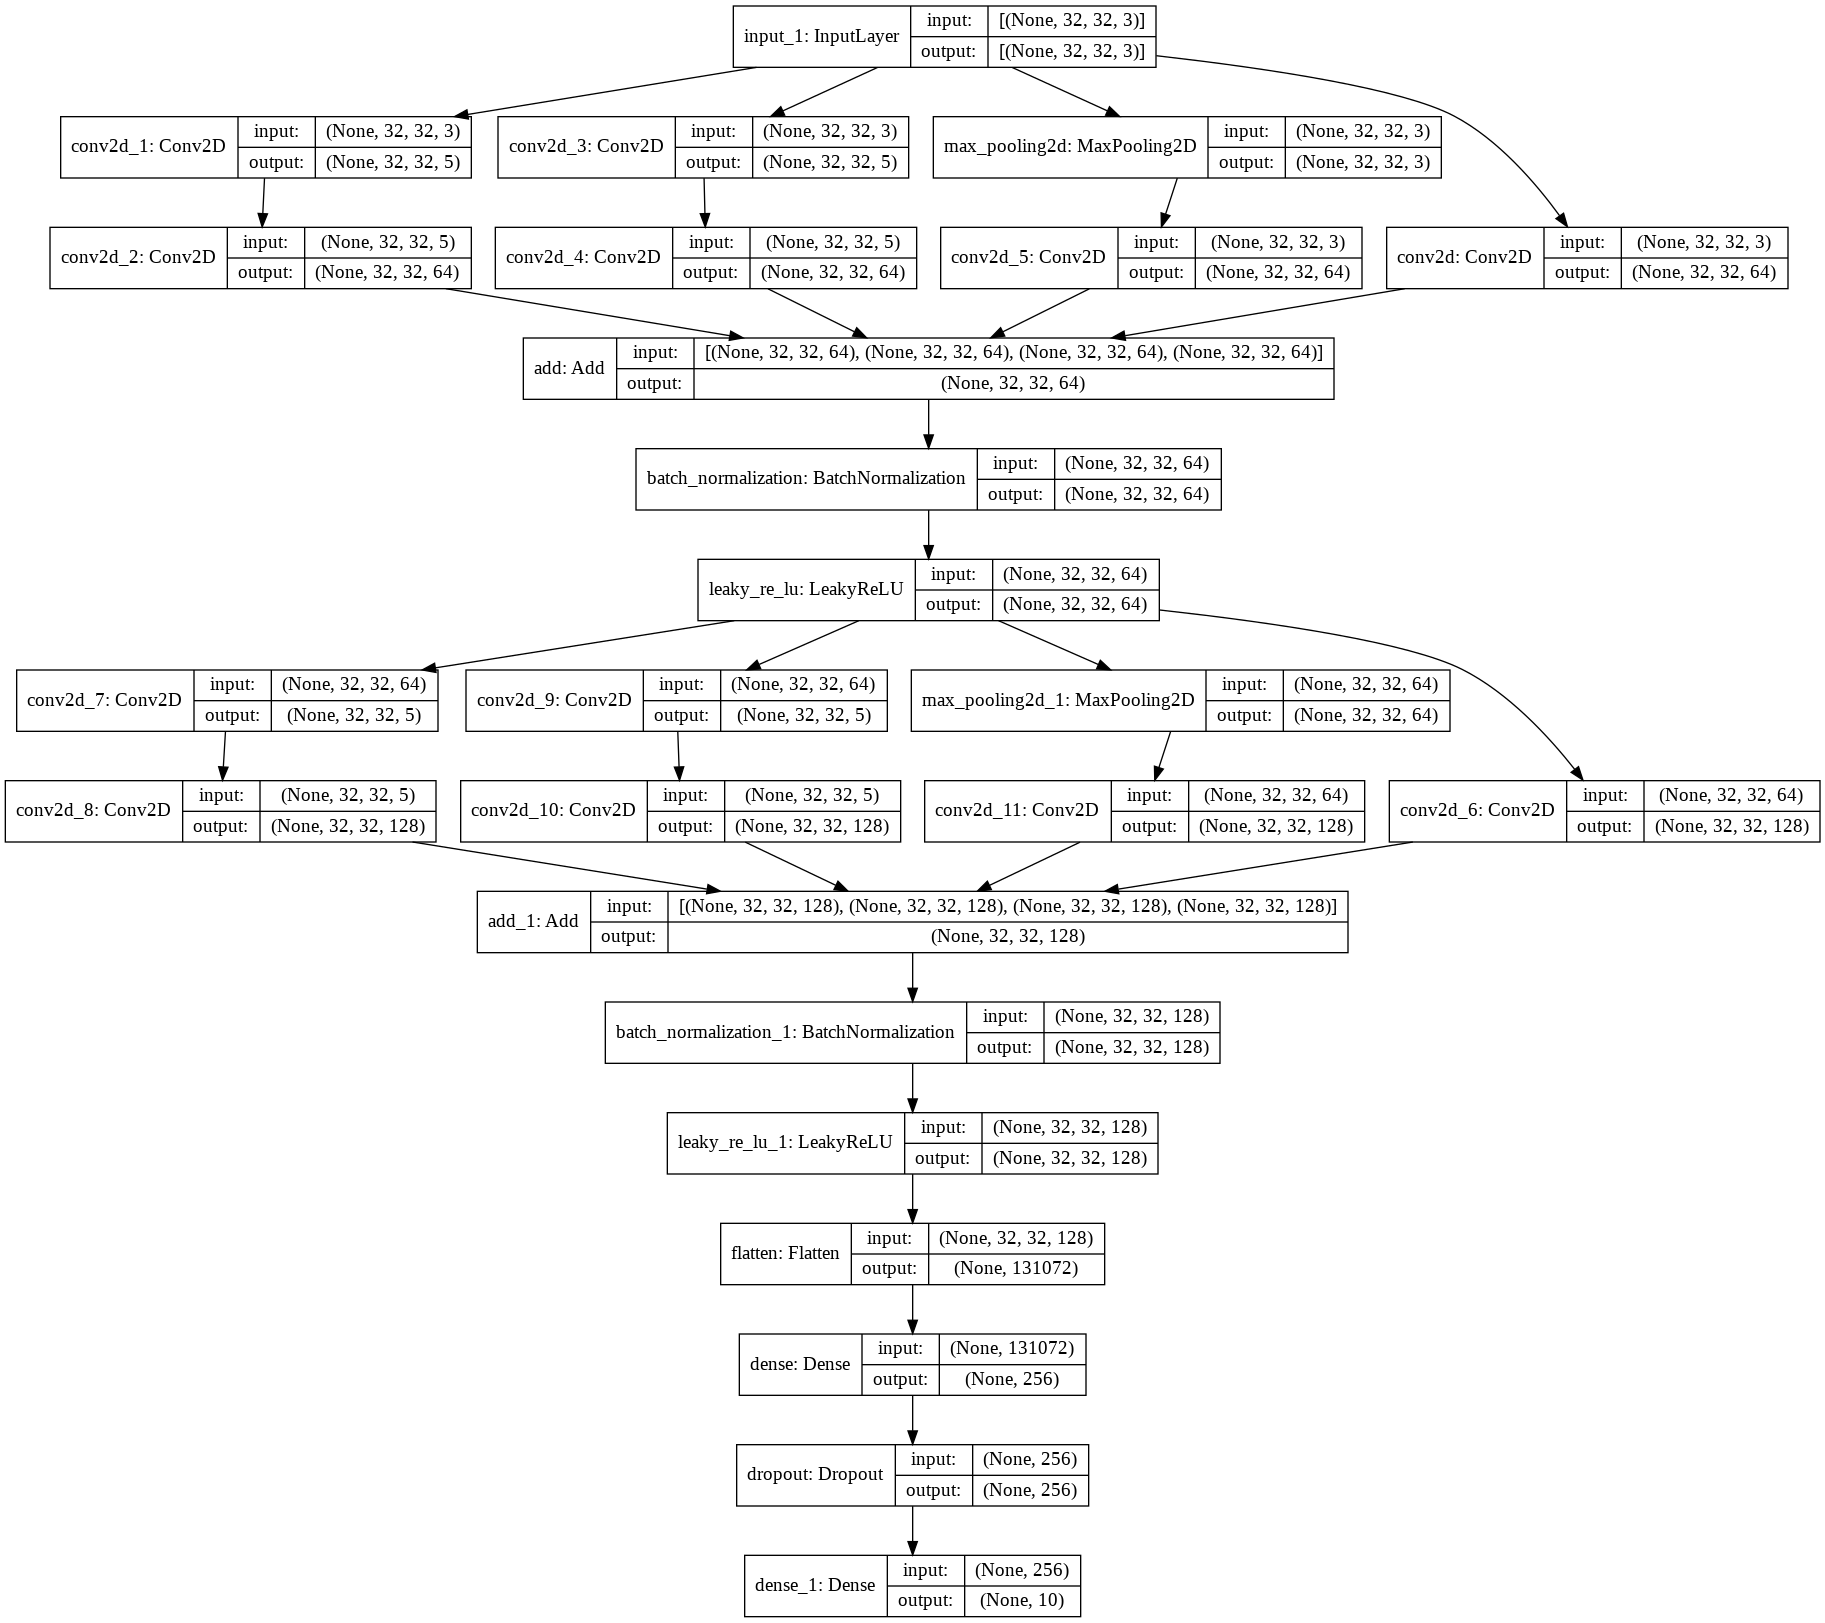

In [0]:
keras.utils.plot_model(model, 'cifar10-inception_model.png', show_shapes=True)

In [0]:
def loss_fn(model, images, labels, training=True):
  logits = model(images, training)
  loss = tf.keras.losses.categorical_crossentropy(y_true=labels, y_pred=logits)
  loss = tf.reduce_mean(loss)
  
  return loss

In [0]:
sample_data = np.expand_dims(train_images[0], 0)
print(sample_data.shape)

logits = loss_fn(model, sample_data, train_labels[0])
print(logits)

(1, 32, 32, 3)
tf.Tensor(2.8253462, shape=(), dtype=float32)


In [0]:
optimizer = tf.keras.optimizers.Adam(3e-4, epsilon=1e-1, decay=1e-6)

In [0]:
def grad(model, images, labels):
  with tf.GradientTape() as t:
    loss = loss_fn(model, images, labels)
  
  grads = t.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(grads, model.trainable_variables))

In [0]:
def evaluate(models, images, labels):
  logits = np.zeros([images.shape[0], 10])
  
  for model in models:
    logits += model(images, training=False)
  
  correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(logits), 1), tf.argmax(labels, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  
  return accuracy

In [0]:
import random
from scipy import ndimage

def data_augmentation(images, labels):
    aug_images = []
    aug_labels = []    
    
    for x, y in zip(images, labels):        
#         aug_images.append(x)
#         aug_labels.append(y)
        bg_value = np.median(x)
        
        for _ in range(1):
            angle = random.randint(-5, 5)
            rot_img = ndimage.rotate(x, angle, reshape=False, cval=bg_value)
            
            shift = np.random.randint(-1, 1)
            shift_img = ndimage.shift(rot_img, shift, cval=bg_value)            
            
            aug_images.append(shift_img)
            aug_labels.append(y)
    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels)
    return aug_images, aug_labels

In [0]:
train_images, train_labels = data_augmentation(train_images, train_labels)

In [0]:
print(train_images.shape)
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(256)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(256)

(50000, 32, 32, 3)


In [0]:
m = 5
models = []

for _ in range(m):
  models.append(create_model())

In [0]:
for model in models:
  print(model.name)

model_1
model_2
model_3
model_4
model_5


In [0]:
%%time
import time

EPOCHS = 10
loss_hist_training = []
acc_hist_training = []
acc_hist_testing = []

print("Learning started")

promising = 0
for epoch in range(EPOCHS):
  start = time.time()
  avg_loss = 0.
  avg_train_acc = 0.
  avg_test_acc = 0.
  
  train_step = 0
  test_step = 0
  
#   if epoch != 0:
#     train_images_aug, train_labels_aug = data_augmentation(train_images, train_labels)
#     train_dataset = tf.data.Dataset.from_tensor_slices((train_images_aug, train_labels_aug)).shuffle(60000).batch(256)
#   else:
#     train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(256)
#   test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(256)

  train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(60000).batch(128)
  test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(128)
  print("Epoch: {}'s' Training Starts".format(epoch+1))
  for model in models:
    for images, labels in train_dataset:
      grad(model,images, labels)
      
      
      loss = loss_fn(model, images, labels)
      loss_hist_training.append(loss)
      avg_loss = avg_loss + loss
        
      acc = evaluate(models, images, labels)
      acc_hist_training.append(acc)
      avg_train_acc += acc
    
      train_step += 1
  
    print("{} is done! for epoch{}".format(model.name, epoch+1))
    
  
  avg_loss  /= train_step
  avg_train_acc /= train_step  
#   promising = avg_train_acc

  print("Train taken {:.9f}".format(time.time()-start))
  print("Calculate Test Accuracy")
  for images, labels in test_dataset:
    acc = evaluate(models, images, labels)
    acc_hist_testing.append(acc)
    avg_test_acc += acc
    test_step += 1
  
  avg_test_acc /= test_step
  
  print("Epoch: {}    Avg_train: {}    Avg_test: {}    Avg_loss: {}".format(epoch+1, avg_train_acc, avg_test_acc, avg_loss))

Learning started
Epoch: 1's' Training Starts


W0616 12:39:34.371805 140345106970496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


model_1 is done! for epoch1
model_2 is done! for epoch1
model_3 is done! for epoch1
model_4 is done! for epoch1
model_5 is done! for epoch1
Train taken 1097.661890984
Calculate Test Accuracy
Epoch: 1    Avg_train: 0.5123393535614014    Avg_test: 0.5534018874168396    Avg_loss: 1.5713900327682495
Epoch: 2's' Training Starts
model_1 is done! for epoch2
model_2 is done! for epoch2
model_3 is done! for epoch2
model_4 is done! for epoch2
model_5 is done! for epoch2
Train taken 1093.326467991
Calculate Test Accuracy
Epoch: 2    Avg_train: 0.6466360092163086    Avg_test: 0.6136273741722107    Avg_loss: 1.232855200767517
Epoch: 3's' Training Starts
model_1 is done! for epoch3
model_2 is done! for epoch3
model_3 is done! for epoch3
model_4 is done! for epoch3
model_5 is done! for epoch3
Train taken 1093.863249063
Calculate Test Accuracy
Epoch: 3    Avg_train: 0.7182696461677551    Avg_test: 0.6408227682113647    Avg_loss: 1.0465456247329712
Epoch: 4's' Training Starts
model_1 is done! for epoch

In [0]:
plt.plot(loss_hist_testing, 'r')
plt.plot(loss_hist_training, 'b')
plt.show()

In [0]:
plt.plot(acc_hist_testing, 'r')
plt.plot(acc_hist_training, 'b')
plt.show()